In [15]:
from subgrounds import Subgrounds
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import is_numeric_dtype
from datetime import datetime, timedelta



In [16]:
SUBGRAPH_API_URL = "http://192.168.1.64:8000/subgraphs/name/papercliplabs/0x-protocol-mainnet-final"

BASE_SUBGRAPH_API_URL = "https://api.thegraph.com/subgraphs/name/papercliplabs/0x-protocol-base"

sg = Subgrounds()

zero_ex = sg.load_subgraph(SUBGRAPH_API_URL)

print(date.today())

TIMESTAMP_NAME = "timestamp"
ALL_ENTRIES = 100000000
CHAIN = "mainnet" # just used to store dumps
STORE_DUMPS = False


/Users/spencerperkins/.pyenv/versions/3.10.1/lib/python3.10/json/decoder.py:378: ResourceWarning: unclosed <socket.socket fd=76, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.1.66', 54526), raddr=('192.168.1.64', 8000)>
  obj, end = self.scan_once(s, idx)


2024-01-31


In [17]:
def plot_time_series_df(df, title, onlyLast30Days = False, deltaAsBar = False): 
    if STORE_DUMPS: 
        df.to_csv("../data/subgraphDumps/" + CHAIN + "/" + title + ".csv")

    for k in df.keys():
        if(k != TIMESTAMP_NAME) and is_numeric_dtype(df[k]):
            timestamps = np.array(df[TIMESTAMP_NAME])
            cumulative = np.array(df[k])

            fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7, 7))

            subtractor = np.insert(cumulative[:-1], 0, 0)
            delta = cumulative - subtractor

            # Since snapshots are for the start of the interval, shift back by 1 to align to correct dates
            delta = np.append(delta[1:], 0);

            if onlyLast30Days:
                cutoff = np.datetime64("now") - np.timedelta64(30, "D")
                keep_indecies = np.where(timestamps > cutoff)
                timestamps = timestamps[keep_indecies]
                cumulative = cumulative[keep_indecies]
                delta = delta[keep_indecies]

            if deltaAsBar:
                # Delta  
                ax[0].bar(timestamps, delta)
                ax[0].set_title(title + ": " + k.split("_")[-1] + " - delta", y=1.08)
            else:
                # Delta 
                ax[0].plot(timestamps, delta)
                ax[0].set_title(title + ": " + k.split("_")[-1] + " - delta", y=1.08)


            # Cumulative - all time
            ax[1].plot(timestamps, cumulative)
            ax[1].set_title(title + ": " + k.split("_")[-1] + " - cumulative", y=1.08)
            ax[1].tick_params(axis='x', labelrotation=30)
            plt.tight_layout(pad=1.0)

            plt.show()

    plt.show()  

timestamp protocol_dailyDataSnapshots_data_id  \
0    2020-09-23 06:04:53                          0x0006c906   
1    2020-09-25 17:23:16                          0x0041c906   
2    2020-09-26 00:09:07                          0x0048c906   
3    2020-09-27 01:17:30                          0x0061c906   
4    2020-09-28 00:21:37                          0x0078c906   
...                  ...                                 ...   
1220 2024-01-27 00:00:11                          0x00783b07   
1221 2024-01-28 00:00:35                          0x00903b07   
1222 2024-01-29 00:00:35                          0x00a83b07   
1223 2024-01-30 00:00:23                          0x00c03b07   
1224 2024-01-31 00:00:11                          0x00d83b07   

     protocol_dailyDataSnapshots_data_protocol_id  \
0                                            0x00   
1                                            0x00   
2                                            0x00   
3                                            0x00   
4                                            0x00   
...                                           ...   
1220                                         0x00   
1221                                         0x00   
1222                                         0x00   
1223                                         0x00   
1224                                         0x00   

      protocol_dailyDataSnapshots_data_erc20FillVolumeUsd  \
0                                          3.406900e+01     
1                                          2.220926e+05     
2                                          3.254300e+05     
3                                          3.746610e+05     
4                                          3.984750e+05     
...                                                 ...     
1220                                       4.041093e+14     
1221                                       4.041094e+14     
1222                                       4.041094e+14     
1223                                       4.041094e+14     
1224                                       4.041095e+14     

      protocol_dailyDataSnapshots_data_whitelistErc20FillVolumeUsd  \
0                                          3.406900e+01              
1                                          2.147468e+05              
2                                          3.078791e+05              
3                                          3.549180e+05              
4                                          3.771732e+05              
...                                                 ...              
1220                                       1.042385e+11              
1221                                       1.042742e+11              
1222                                       1.042969e+11              
1223                                       1.043241e+11              
1224                                       1.043811e+11              

      protocol_dailyDataSnapshots_data_erc20FillCount  \
0                                                   1   
1                                                  60   
2                                                  92   
3                                                 162   
4                                                 203   
...                                               ...   
1220                                         10873418   
1221                                         10889886   
1222                                         10907641   
1223                                         10923434   
1224                                         10939486   

      protocol_dailyDataSnapshots_data_nftFillErc20VolumeUsd  \
0                                          0.000000e+00        
1                                          0.000000e+00        
2                                          0.000000e+00        
3                                          0.000000e+00        
4                             

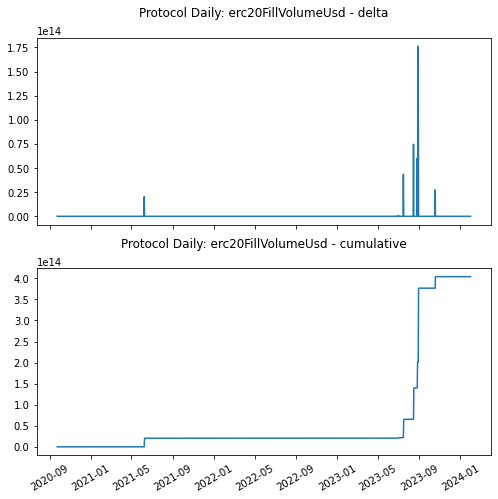

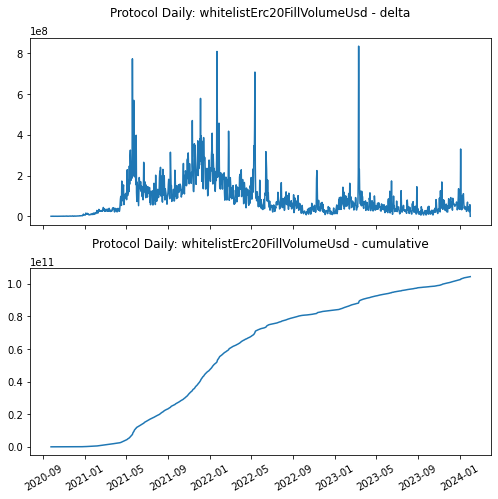

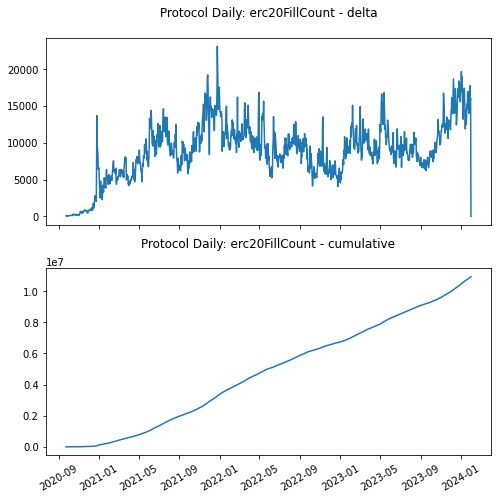

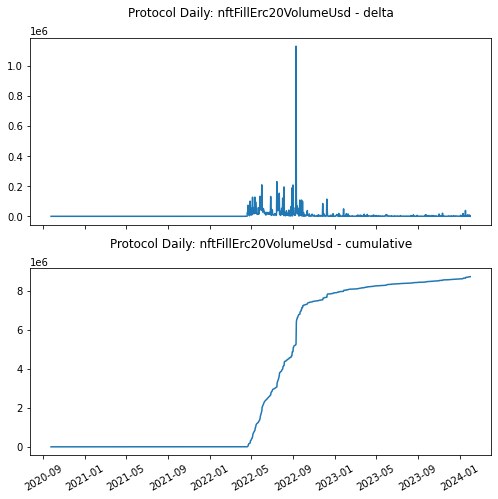

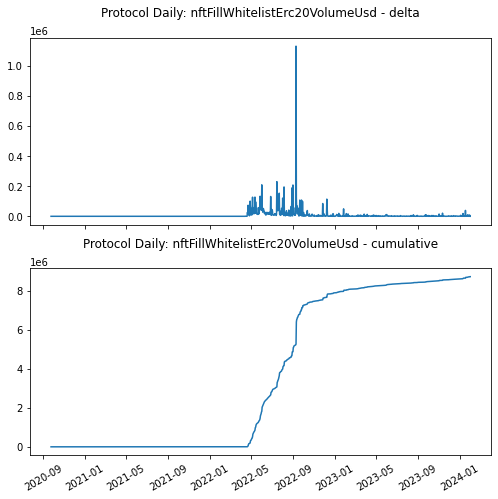

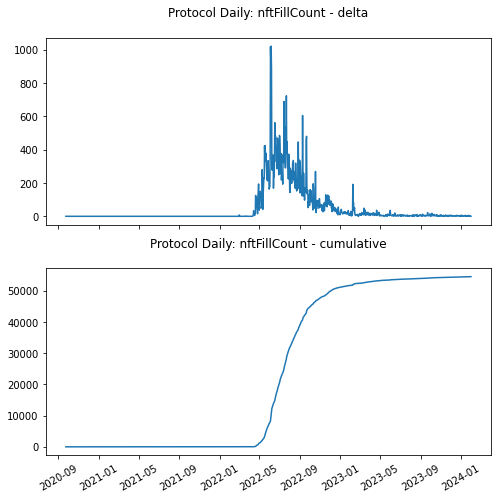

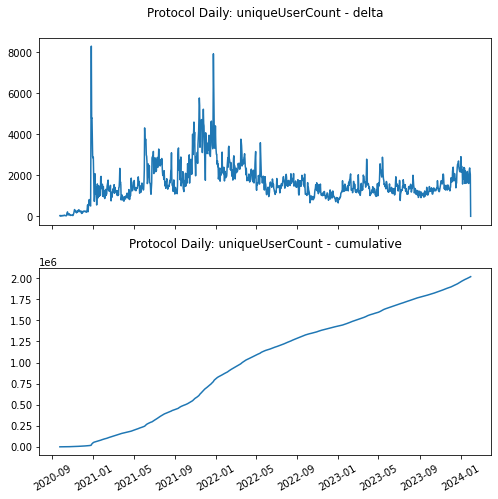

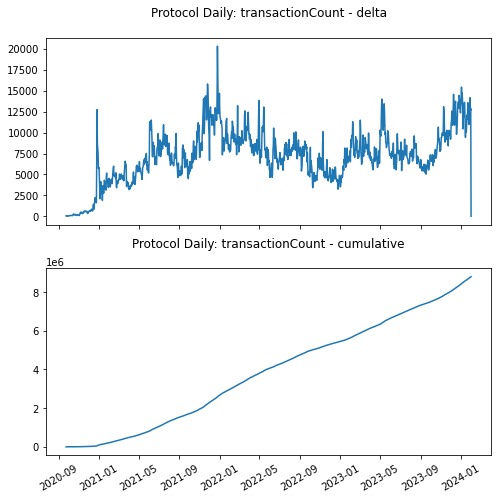

timestamp protocol_weeklyDataSnapshots_data_id  \
0   2020-09-23 06:04:53                           0x0006c906   
1   2020-09-25 17:23:16                           0x0041c906   
2   2020-10-01 00:29:37                           0x00c0c906   
3   2020-10-08 01:05:19                           0x0069ca06   
4   2020-10-15 00:08:01                           0x0010cb06   
..                  ...                                  ...   
171 2023-12-28 00:00:11                           0x00a83807   
172 2024-01-04 00:00:11                           0x00503907   
173 2024-01-11 00:00:35                           0x00f83907   
174 2024-01-18 00:00:11                           0x00a03a07   
175 2024-01-25 00:00:23                           0x00483b07   

    protocol_weeklyDataSnapshots_data_protocol_id  \
0                                            0x00   
1                                            0x00   
2                                            0x00   
3                                            0x00   
4                                            0x00   
..                                            ...   
171                                          0x00   
172                                          0x00   
173                                          0x00   
174                                          0x00   
175                                          0x00   

     protocol_weeklyDataSnapshots_data_erc20FillVolumeUsd  \
0                                         3.406900e+01      
1                                         2.220926e+05      
2                                         1.624620e+06      
3                                         3.092115e+06      
4                                         4.629488e+06      
..                                                 ...      
171                                       4.041072e+14      
172                                       4.041079e+14      
173                                       4.041084e+14      
174                                       4.041089e+14      
175                                       4.041092e+14      

     protocol_weeklyDataSnapshots_data_whitelistErc20FillVolumeUsd  \
0                                         3.406900e+01               
1                                         2.147468e+05               
2                                         1.582934e+06               
3                                         2.997397e+06               
4                                         4.434222e+06               
..                                                 ...               
171                                       1.023129e+11               
172                                       1.030035e+11               
173                                       1.034781e+11               
174                                       1.038641e+11               
175                                       1.041521e+11               

     protocol_weeklyDataSnapshots_data_erc20FillCount  \
0                                                   1   
1                                                  60   
2                                                 359   
3                                                 980   
4                                                1948   
..                                                ...   
171                                          10399377   
172                                          10519422   
173                                          10634682   
174                                          10733653   
175                                          10843464   

     protocol_weeklyDataSnapshots_data_nftFillErc20VolumeUsd  \
0                                         0.000000e+00         
1                                         0.000000e+00         
2                                         0.000000e+00         
3                                         0.000000e+00         
4                            

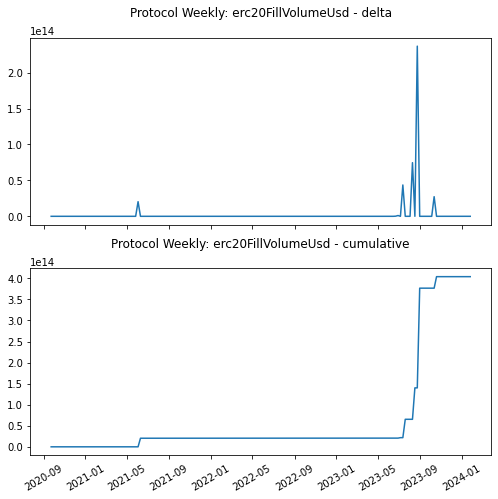

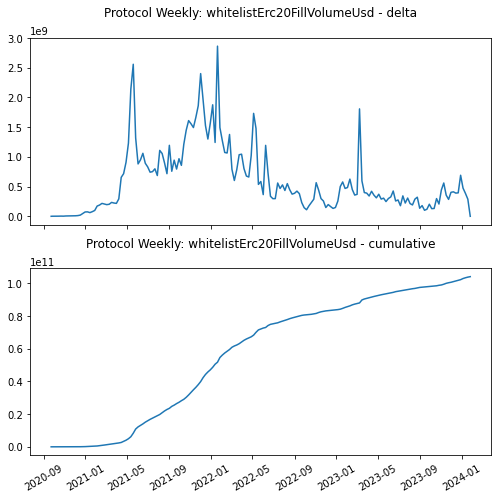

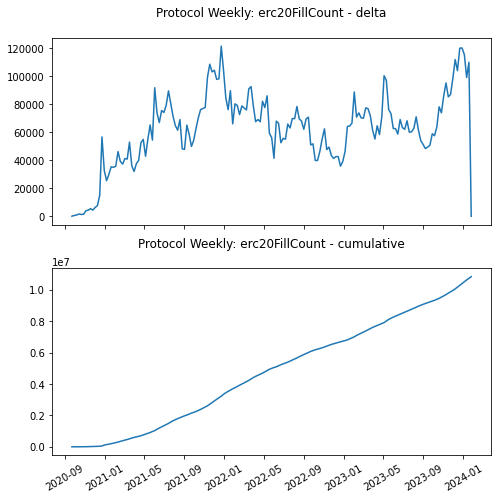

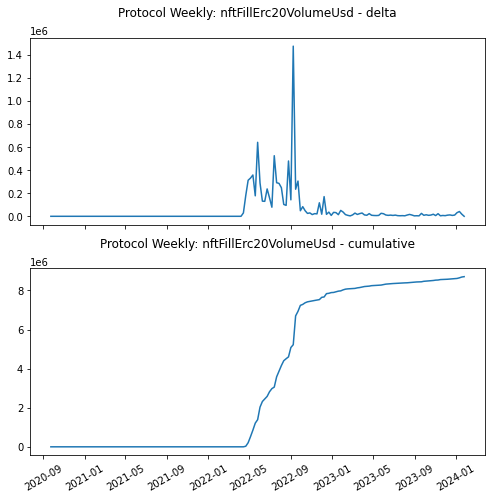

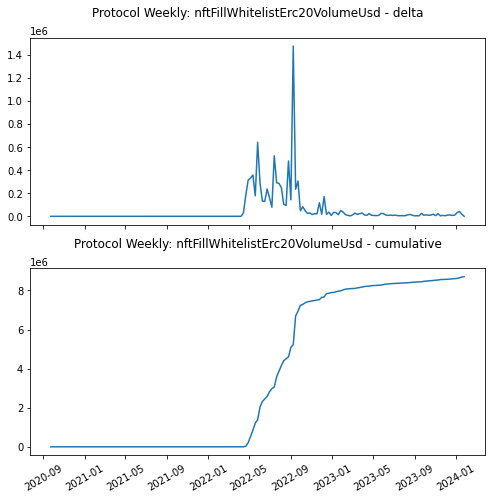

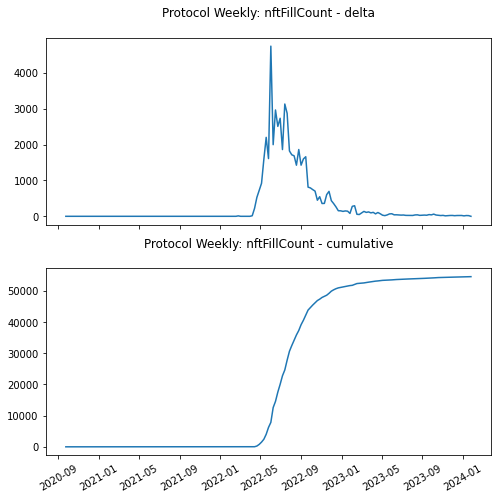

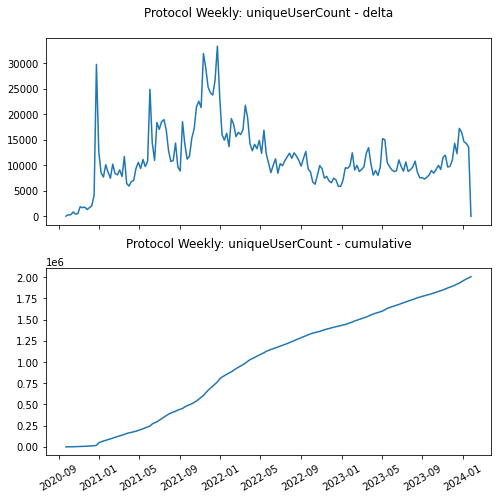

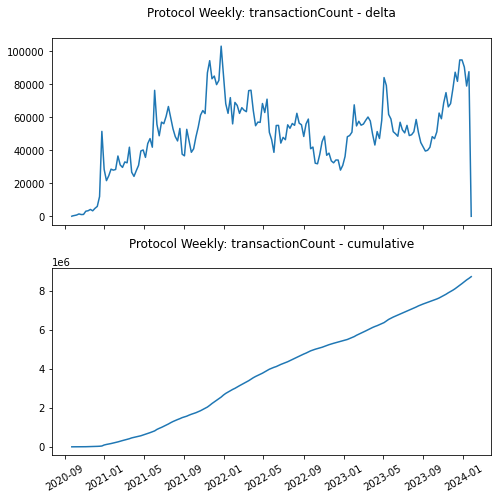

In [18]:
# Protocol Historical

# Daily
protocol_daily = zero_ex.Query.protocol(id="0x00").dailyDataSnapshots(orderBy=zero_ex.DailyProtocolData.timestamp, orderDirection="asc", first=ALL_ENTRIES)
df = sg.query_df([protocol_daily.timestamp, protocol_daily.data])
df.rename(columns={ df.columns[0]: TIMESTAMP_NAME }, inplace = True)
df[TIMESTAMP_NAME] = pd.to_datetime(df[TIMESTAMP_NAME], unit="s")
display(df)

plot_time_series_df(df, "Protocol Daily", False, False)

# Weekly
protocol_weekly = zero_ex.Query.protocol(id="0x00").weeklyDataSnapshots(orderBy=zero_ex.WeeklyProtocolData.timestamp, orderDirection="asc", first=ALL_ENTRIES)
df = sg.query_df([protocol_weekly.timestamp, protocol_weekly.data])
df.rename(columns={ df.columns[0]: TIMESTAMP_NAME }, inplace = True)
df[TIMESTAMP_NAME] = pd.to_datetime(df[TIMESTAMP_NAME], unit="s")
display(df)

plot_time_series_df(df, "Protocol Weekly", False, False)

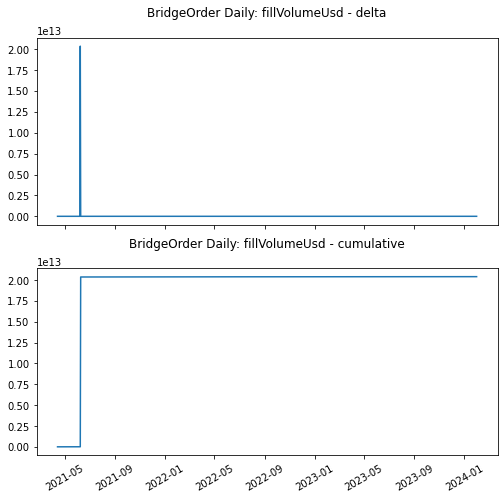

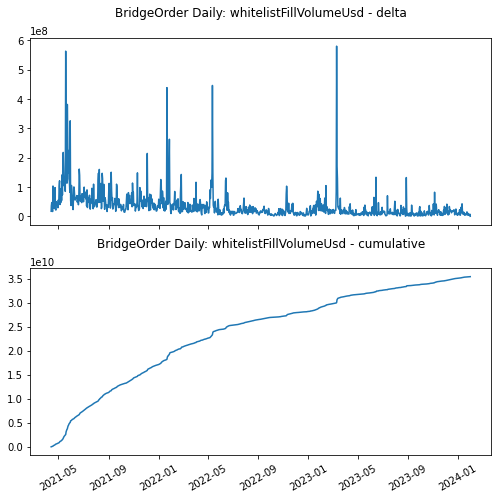

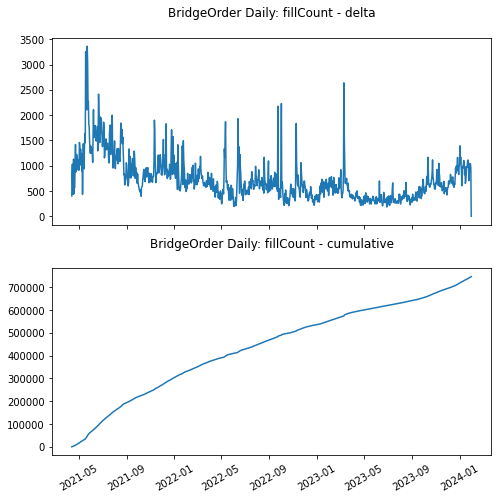

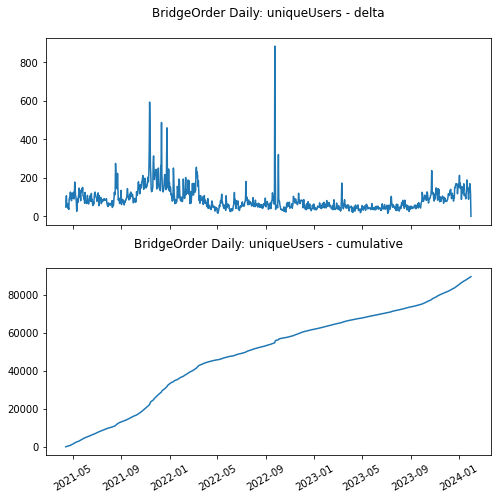

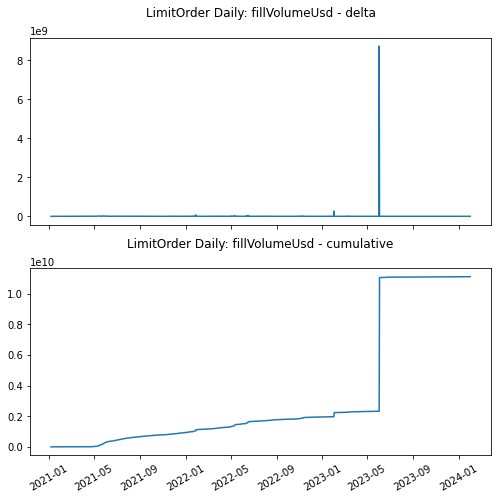

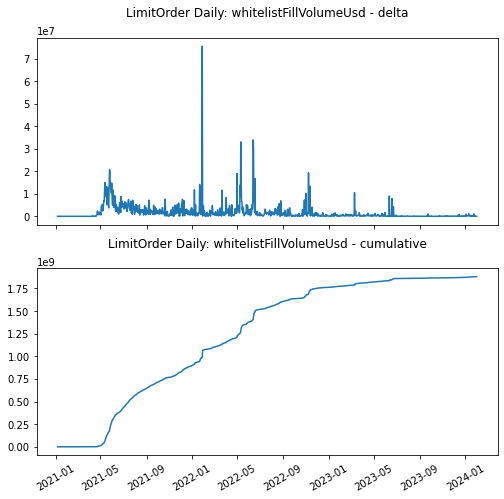

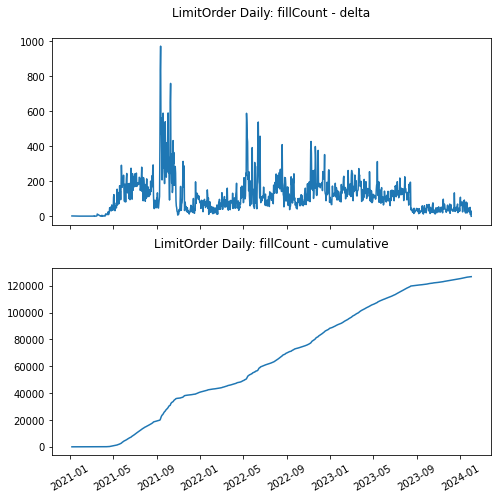

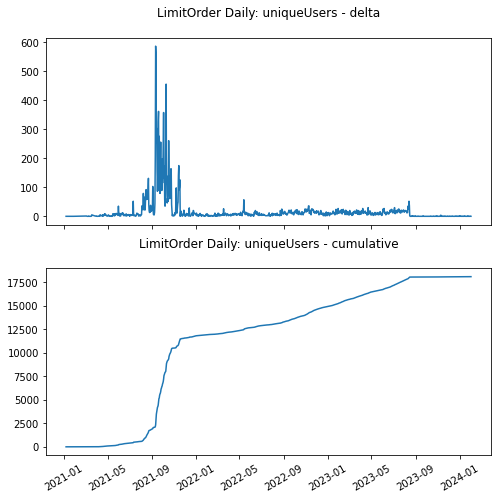

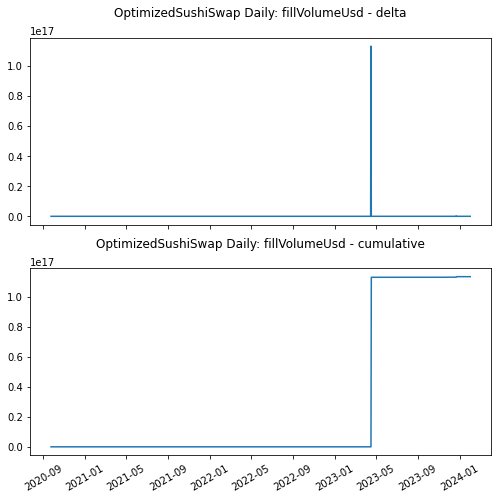

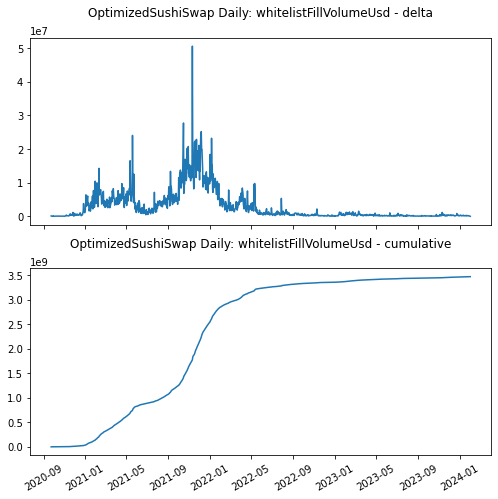

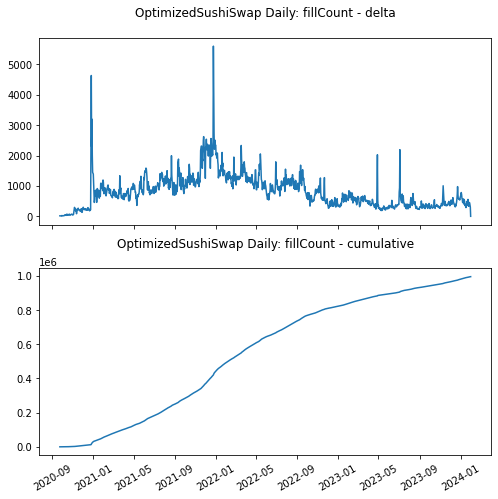

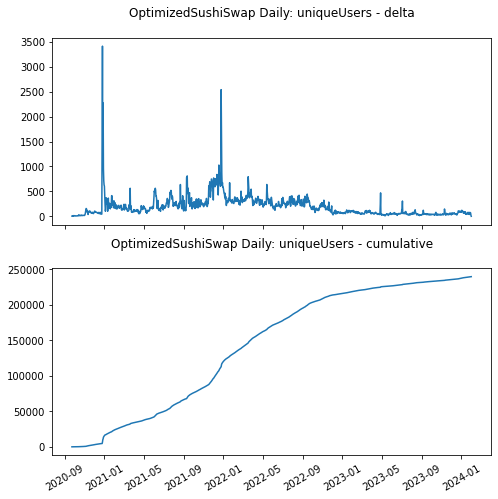

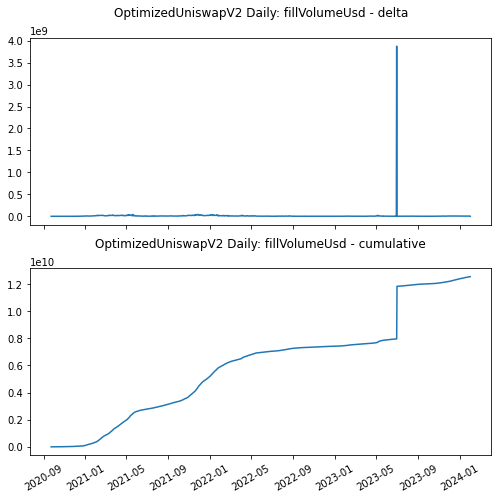

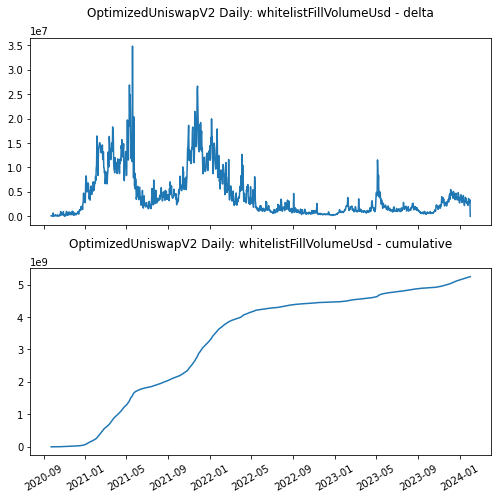

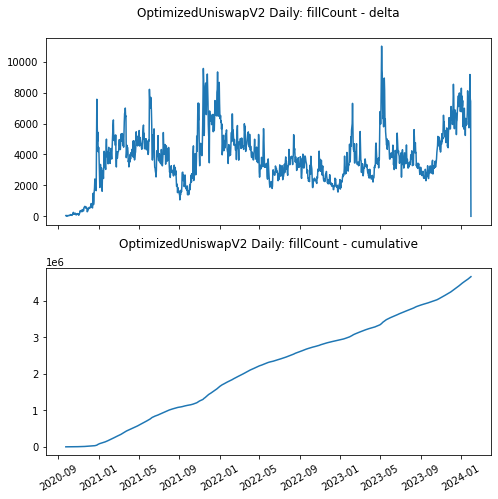

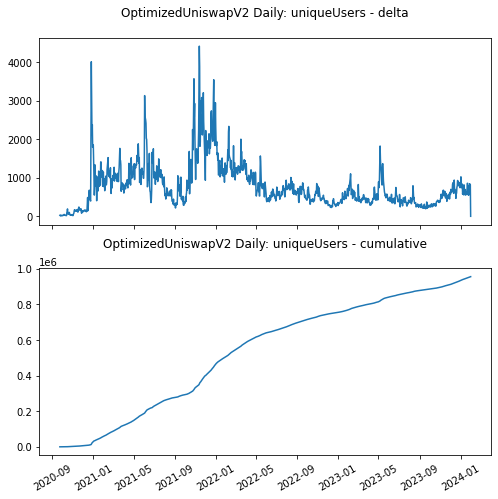

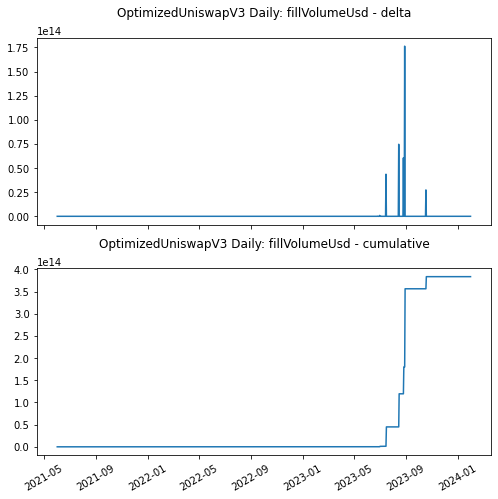

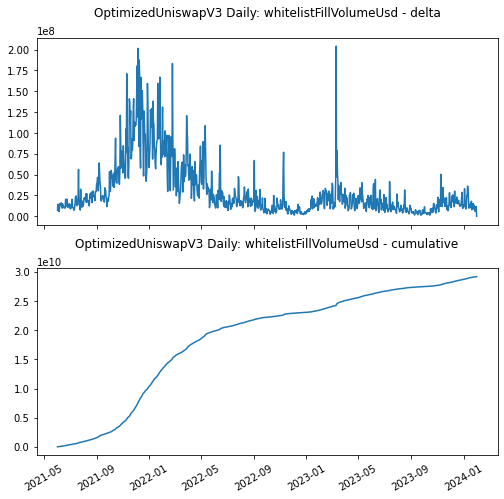

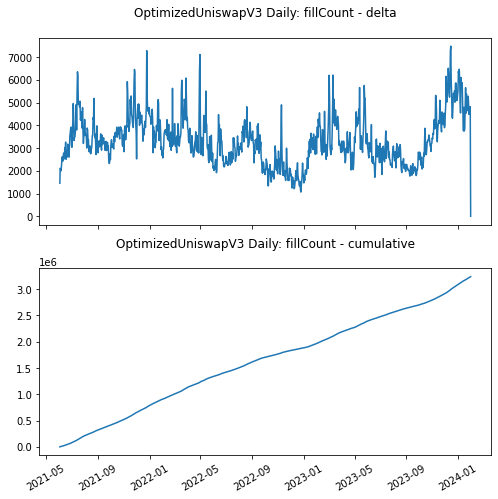

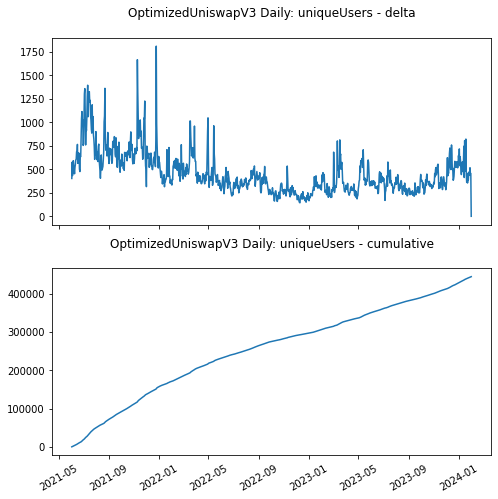

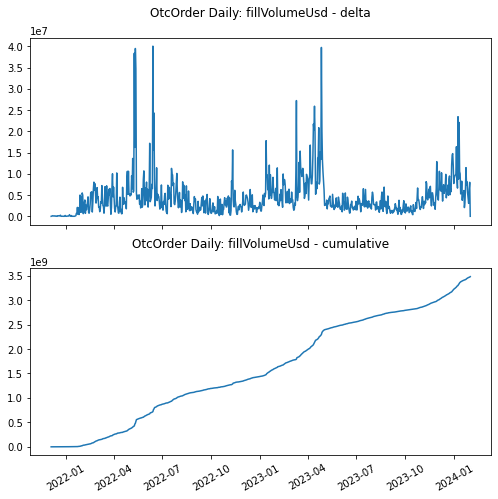

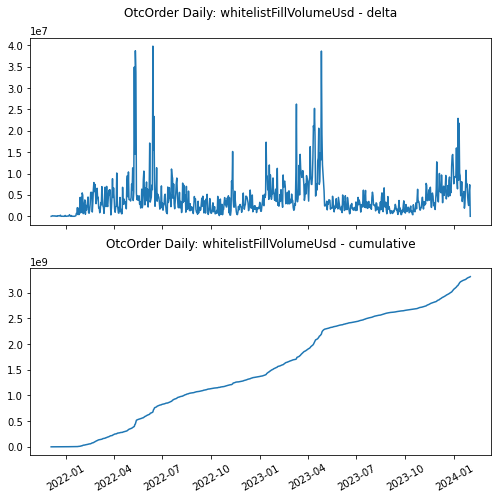

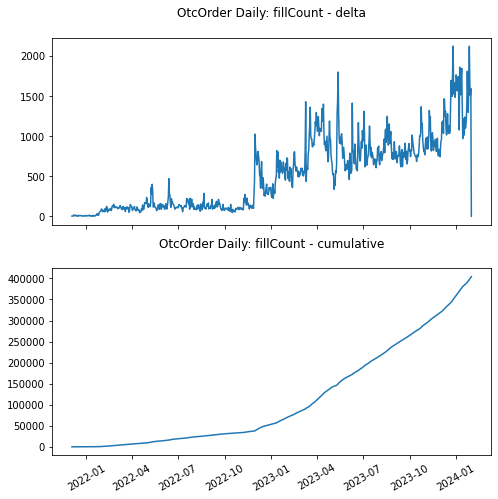

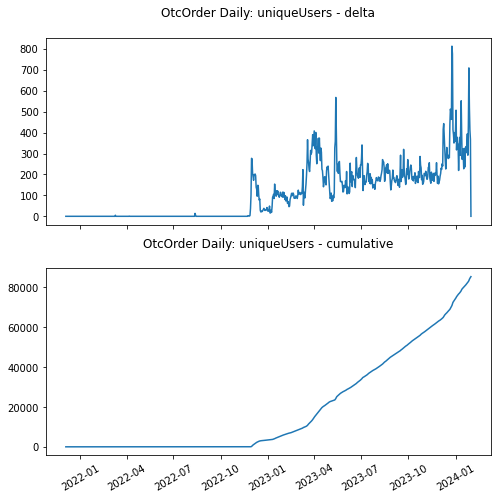

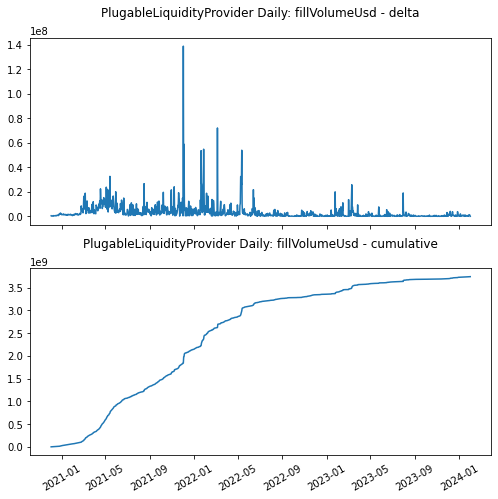

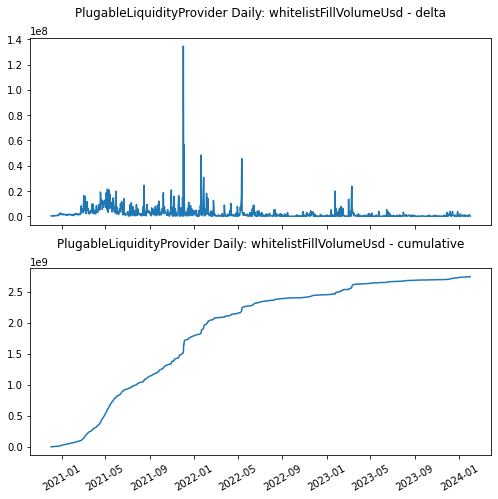

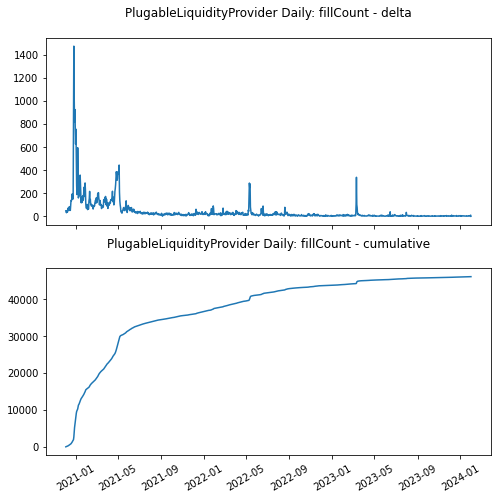

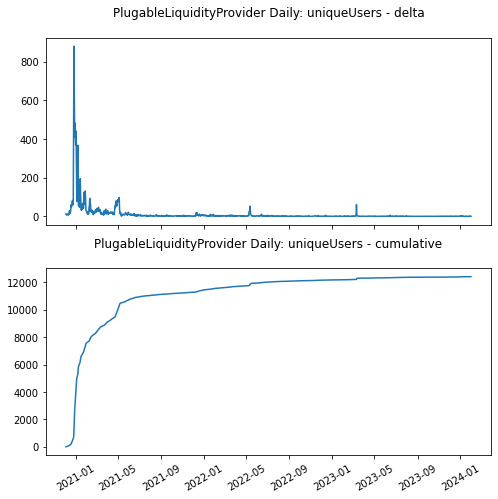

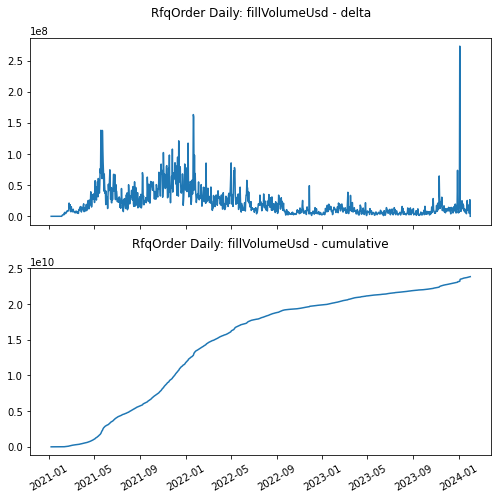

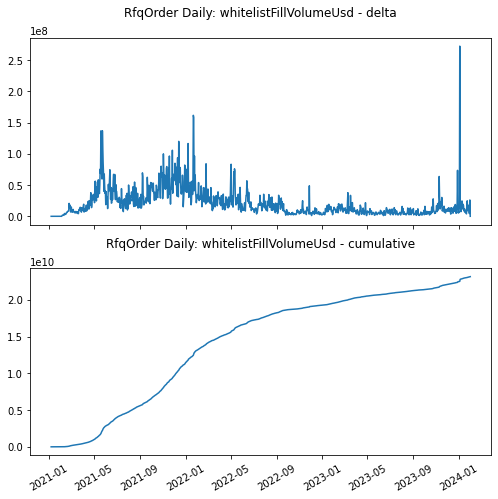

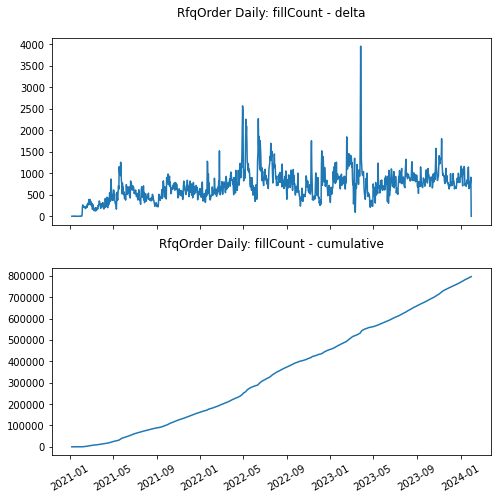

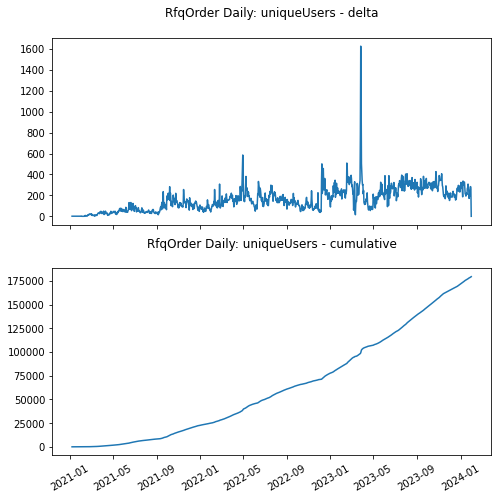

In [19]:
# Fill Type Summary Historical
fill_type_summaries = zero_ex.Query.erc20FillTypeSummaries

df = sg.query_df([fill_type_summaries.id, fill_type_summaries.type], columns=["id", "type"])

for row in df.itertuples():
    snapshots = zero_ex.Query.erc20FillTypeSummary(id=row.id).dailyDataSnapshots(first=ALL_ENTRIES, orderBy=zero_ex.DailyErc20FillTypeSummaryData.timestamp, orderDirection="asc")
    daily_snapshots_df = sg.query_df([snapshots.timestamp, snapshots.data])
    daily_snapshots_df.rename(columns={ daily_snapshots_df.columns[0]: TIMESTAMP_NAME }, inplace = True)
    daily_snapshots_df[TIMESTAMP_NAME] = pd.to_datetime(daily_snapshots_df[TIMESTAMP_NAME], unit="s")
    # display(daily_snapshots_df)
    plot_time_series_df(daily_snapshots_df, f"{row.type} Daily")


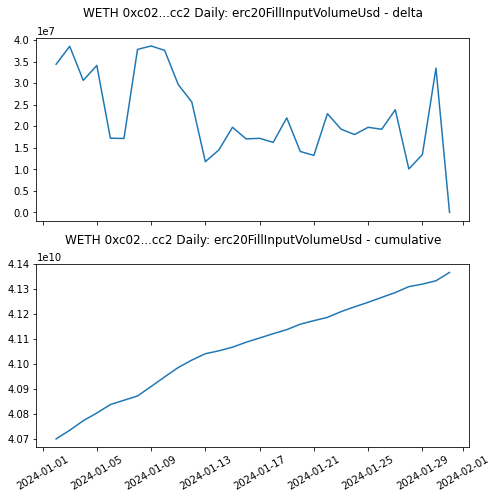

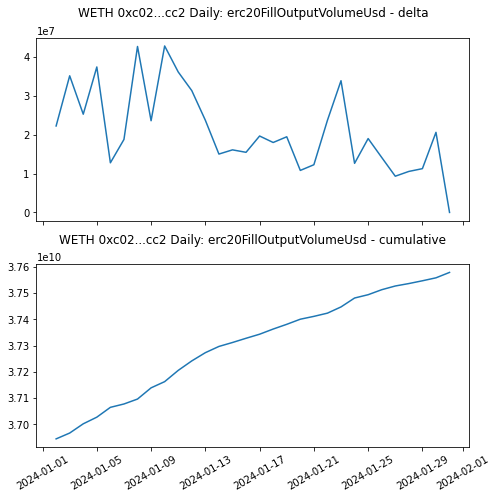

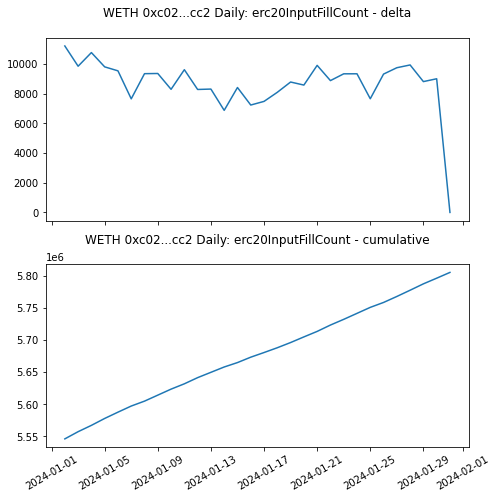

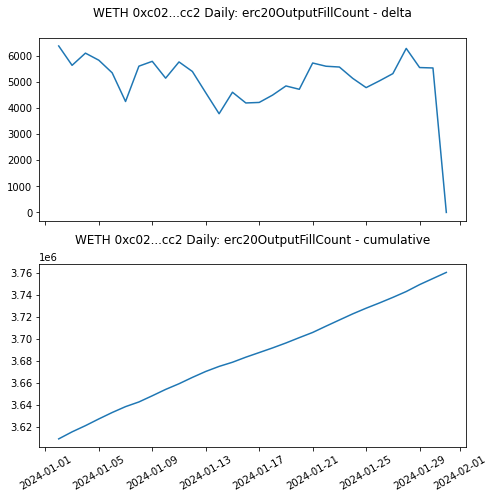

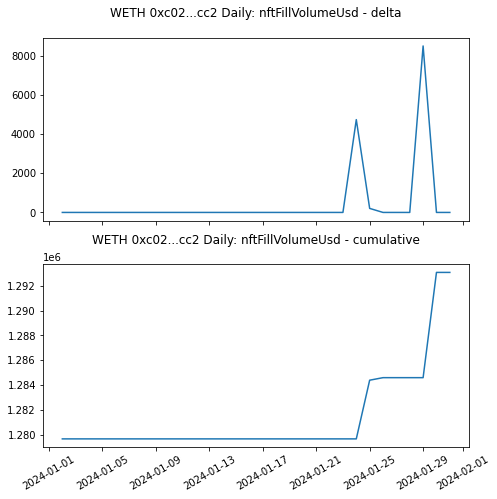

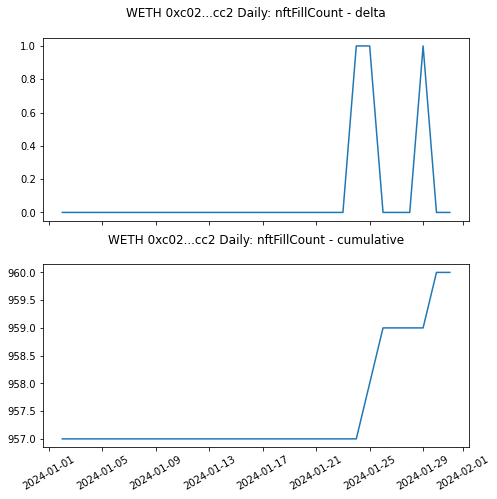

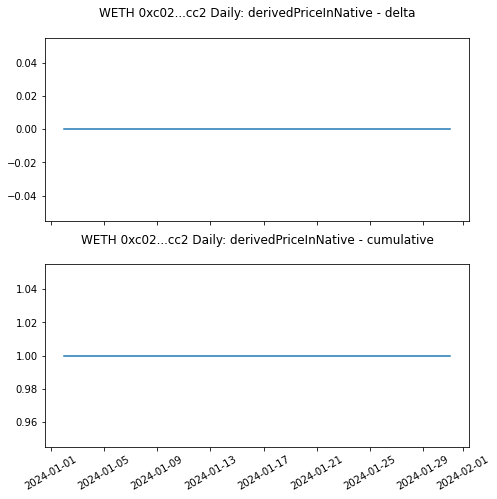

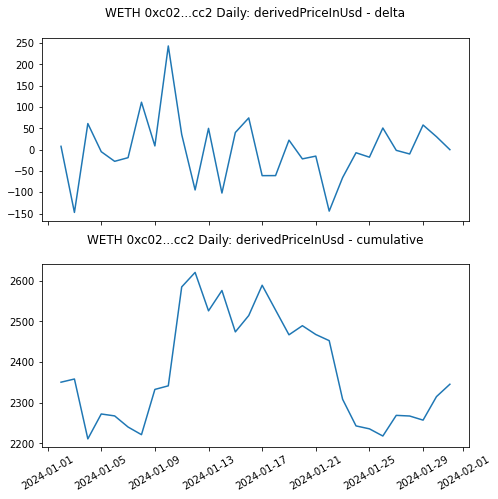

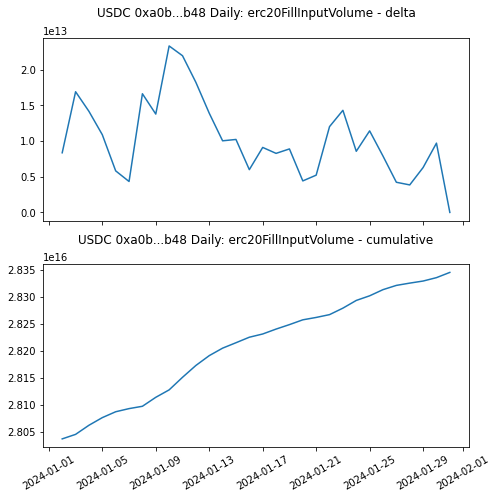

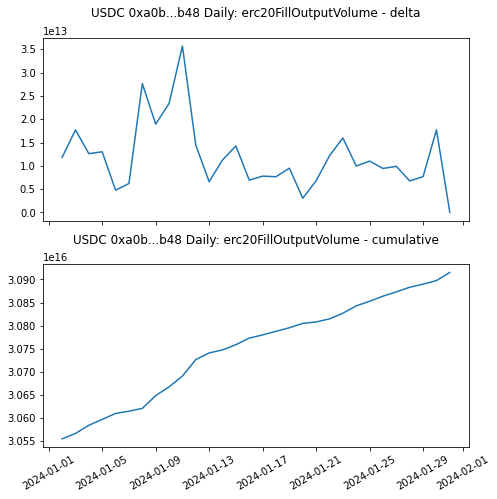

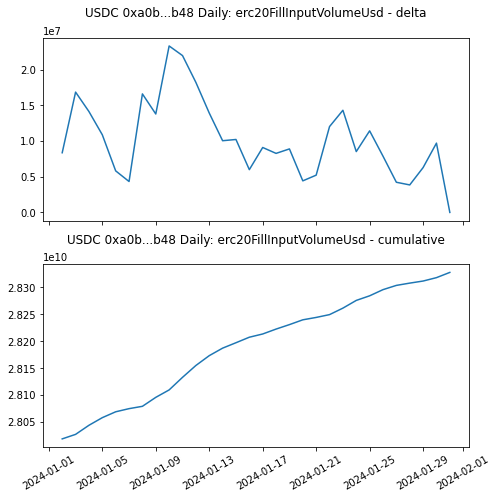

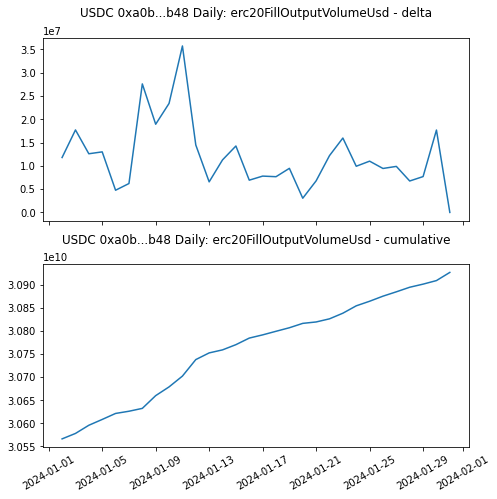

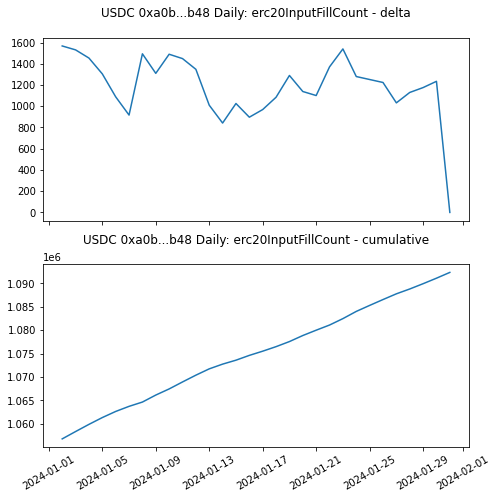

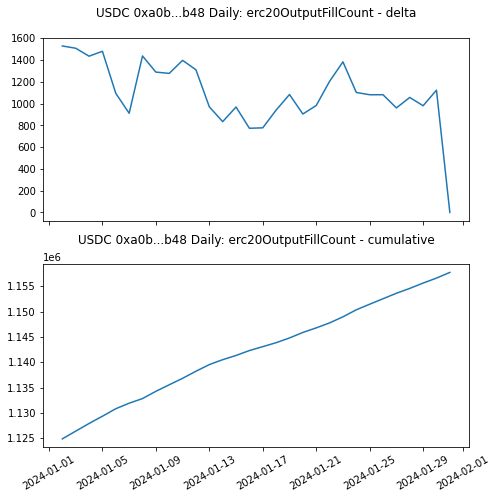

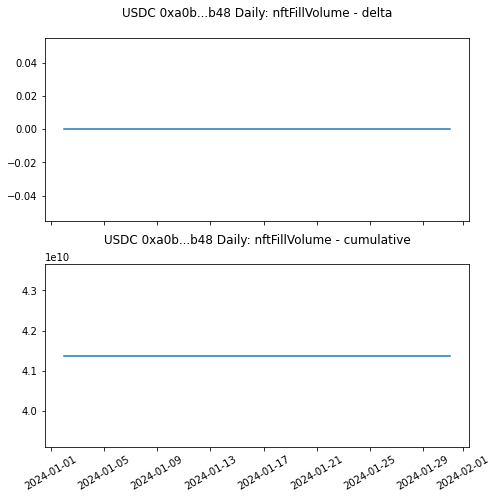

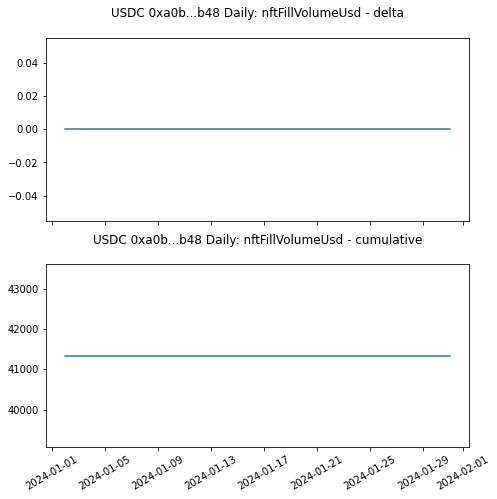

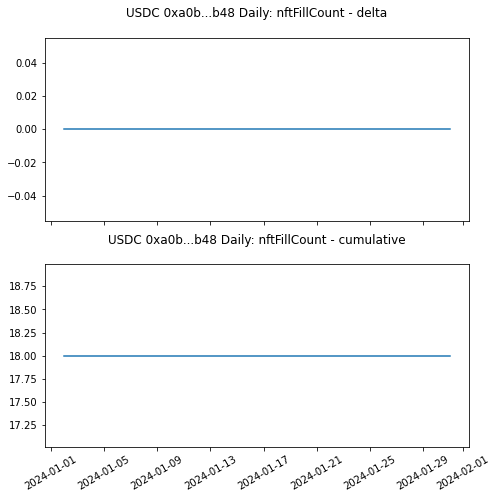

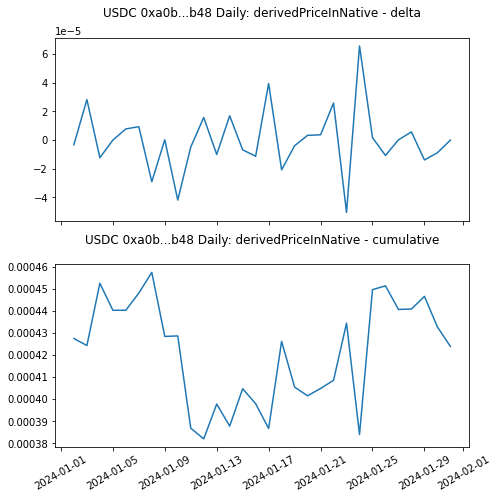

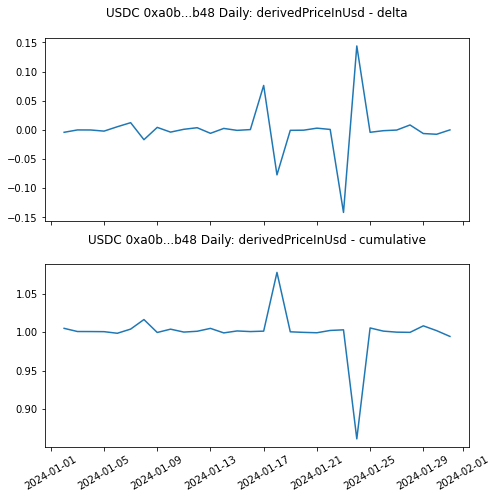

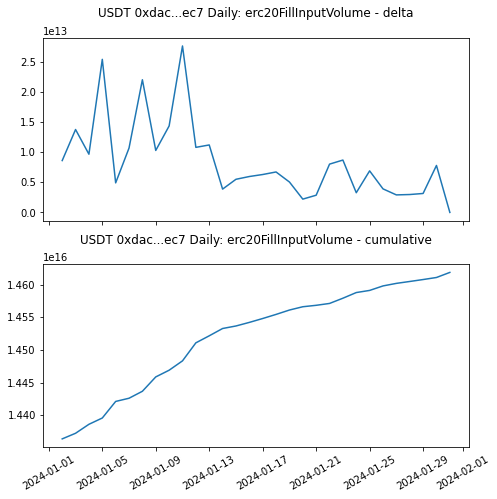

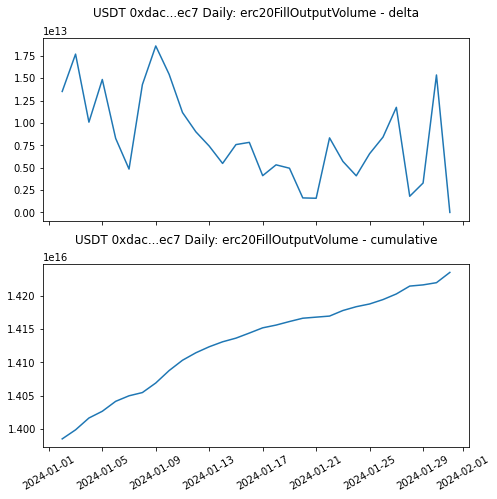

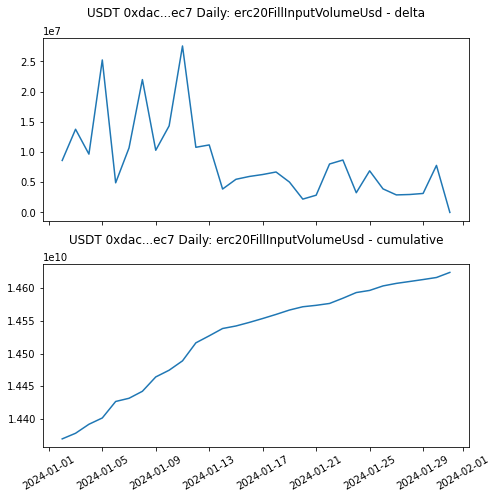

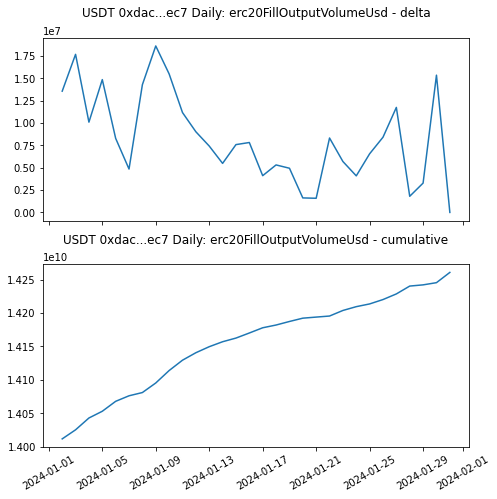

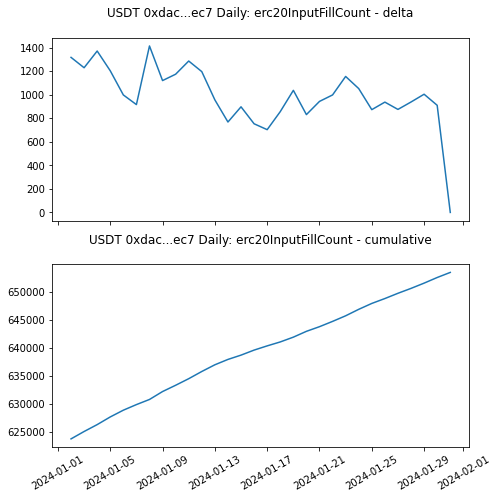

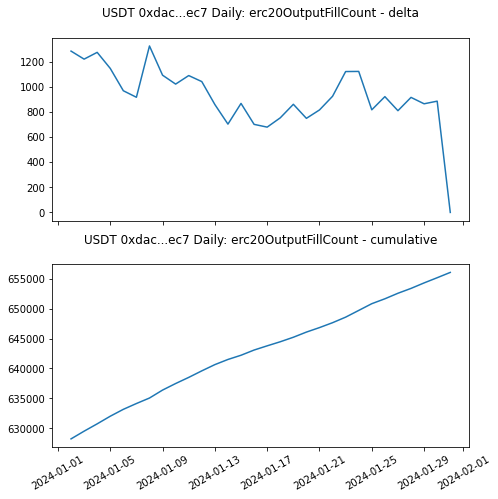

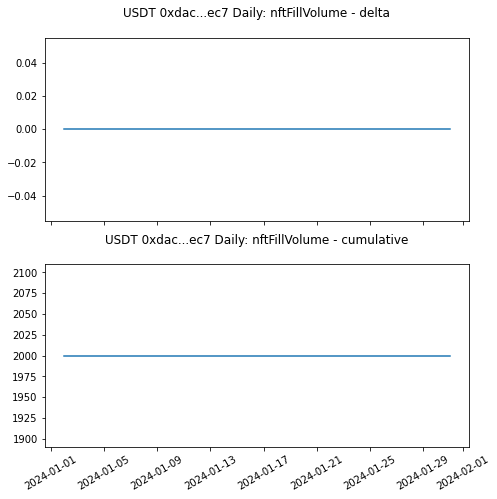

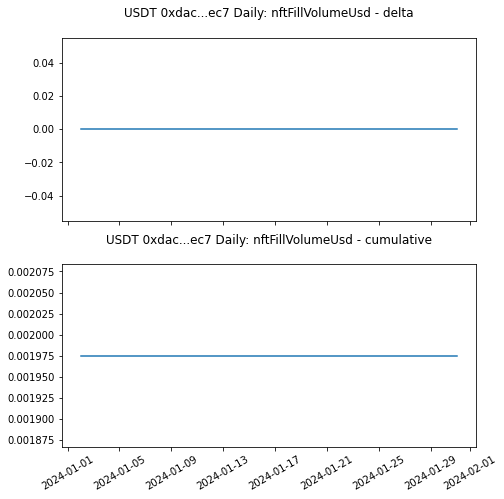

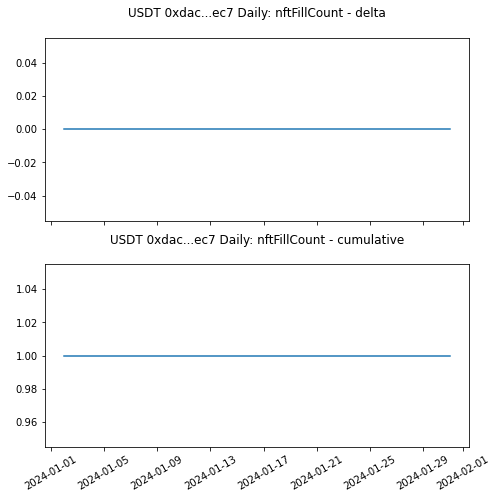

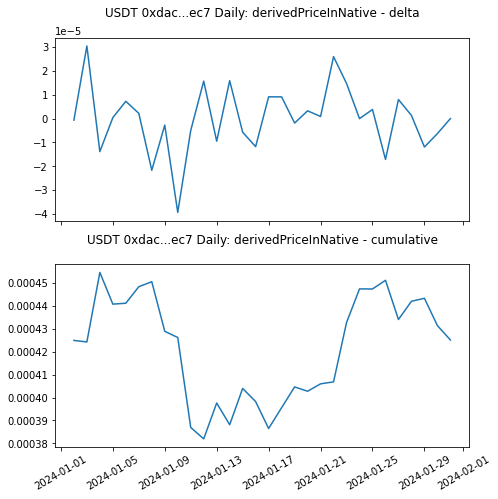

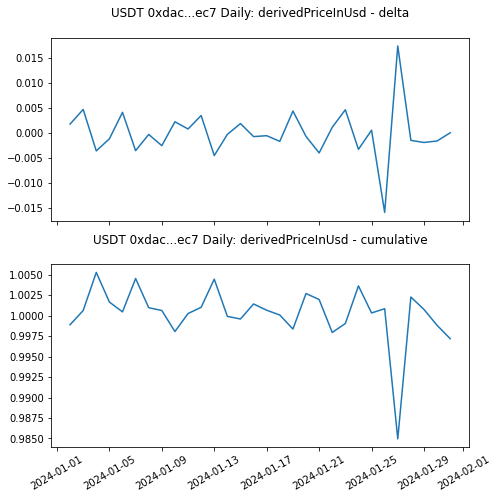

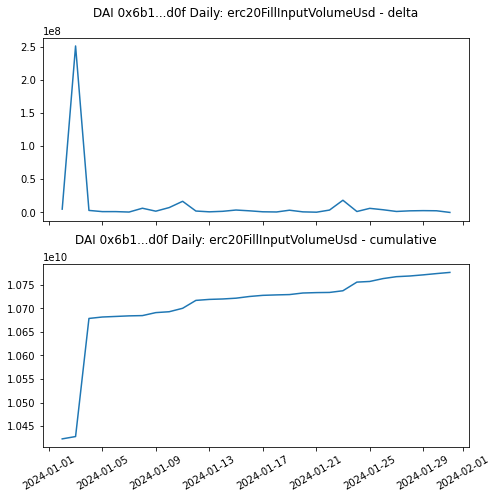

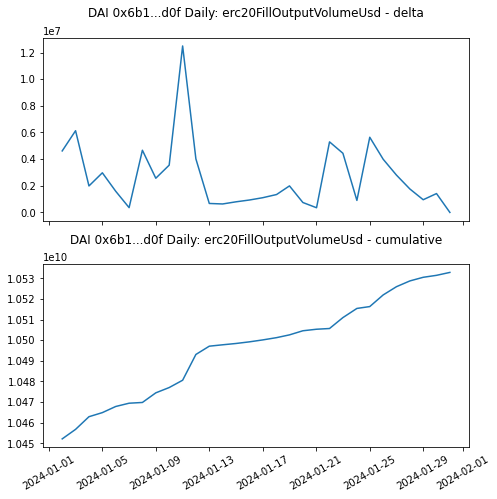

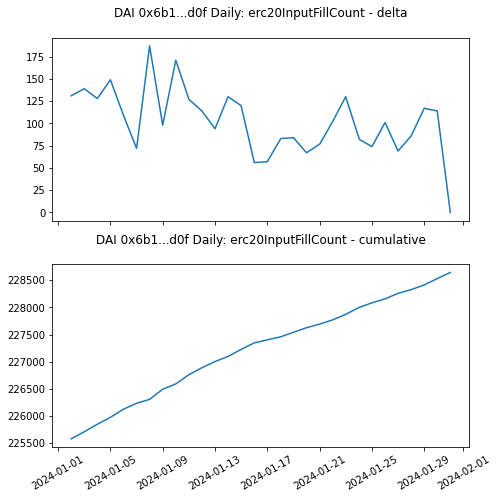

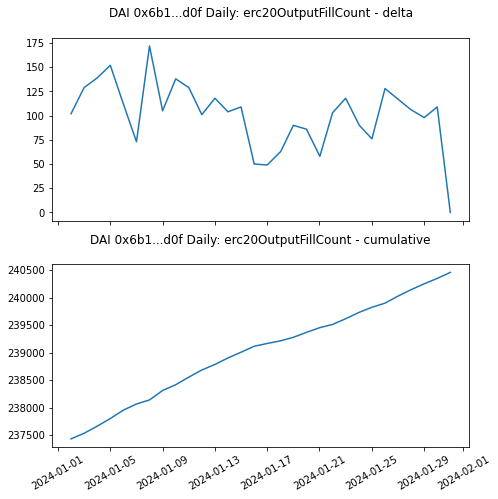

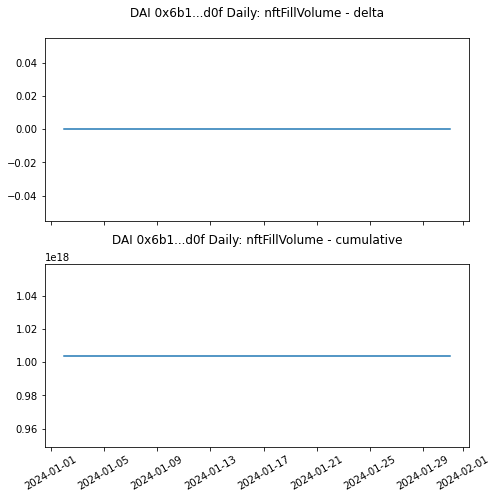

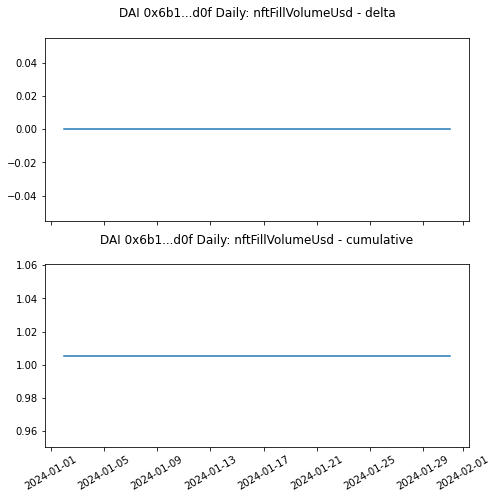

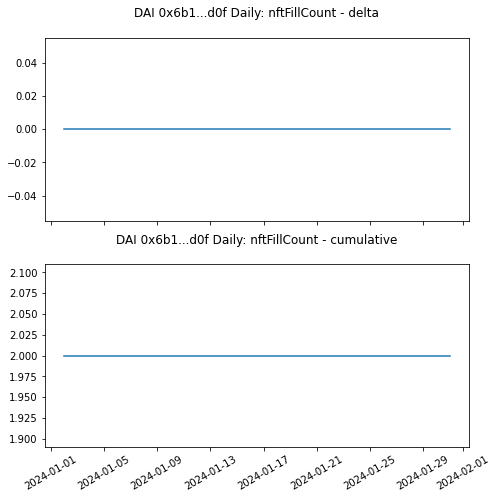

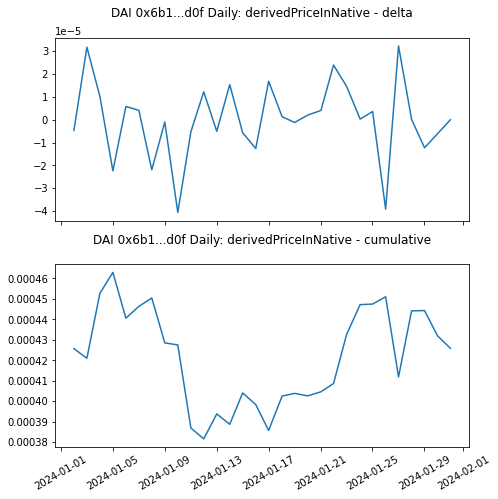

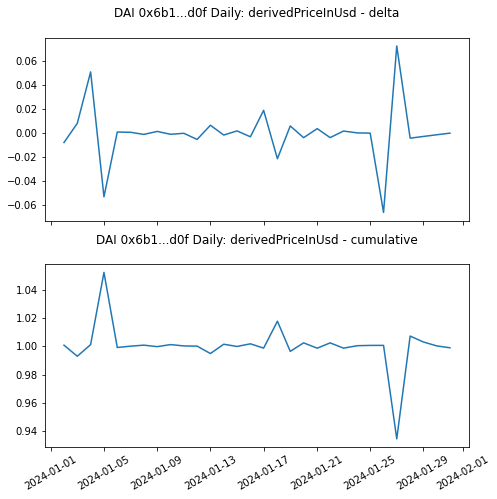

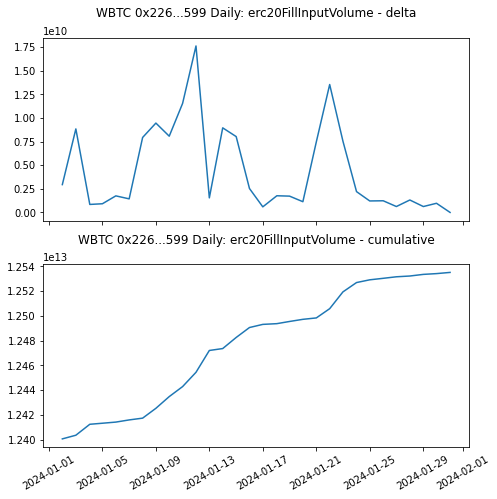

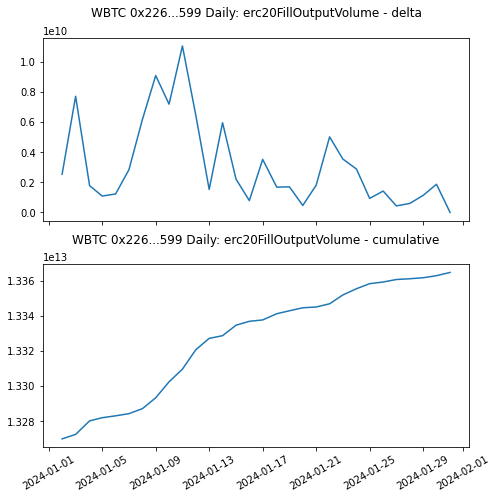

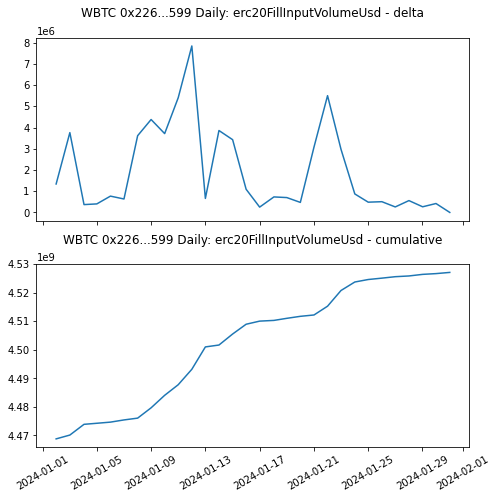

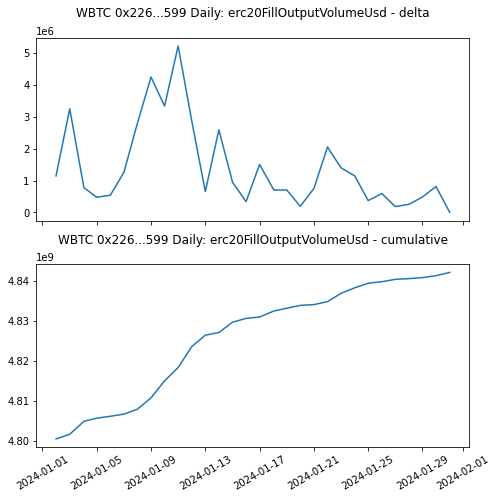

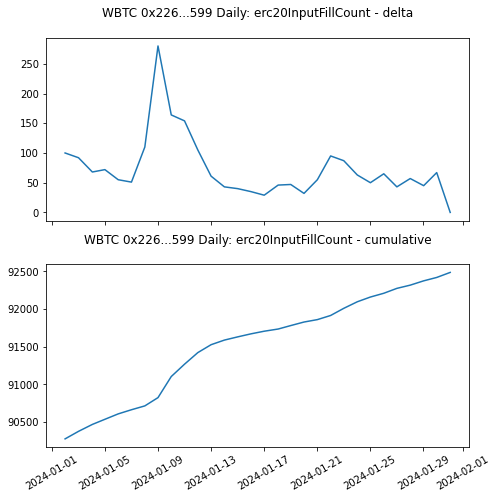

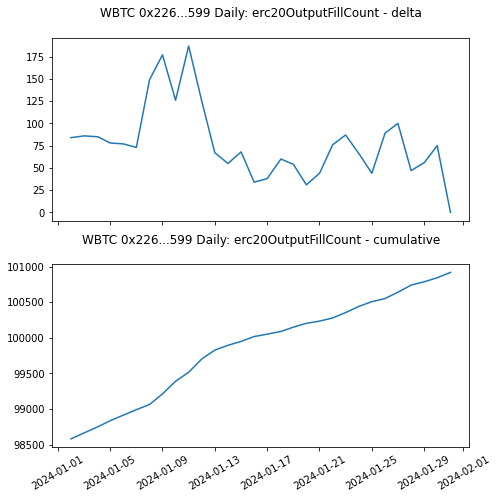

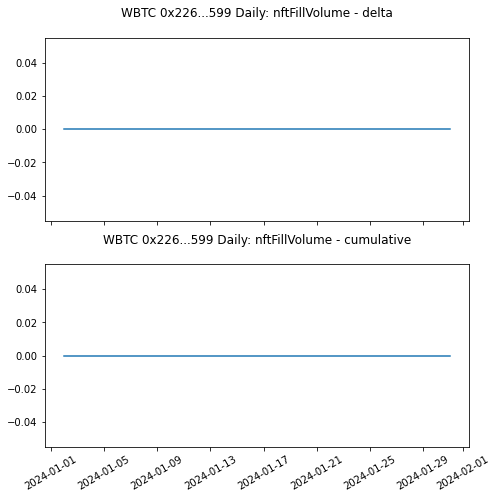

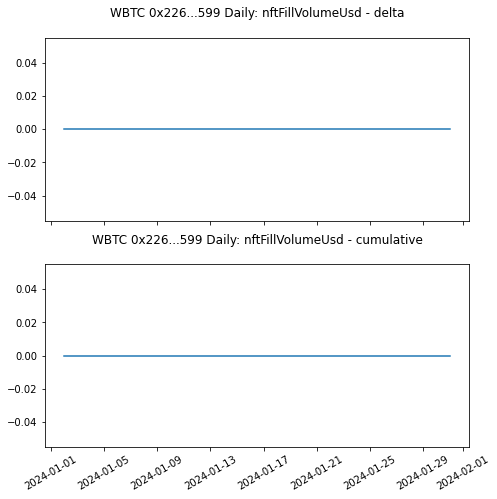

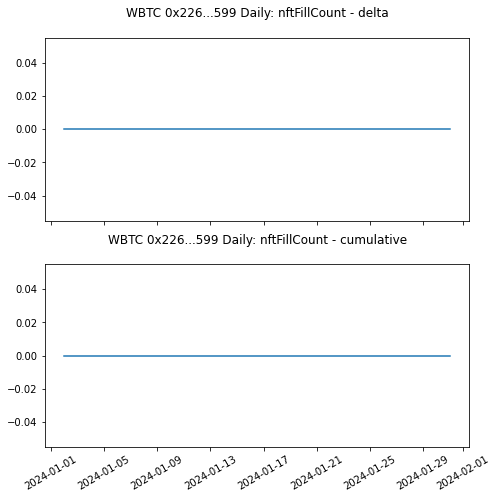

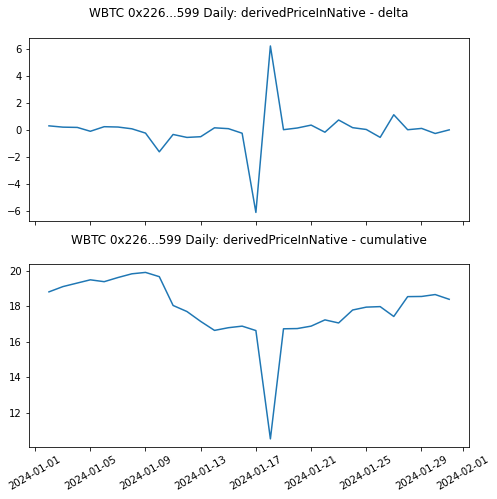

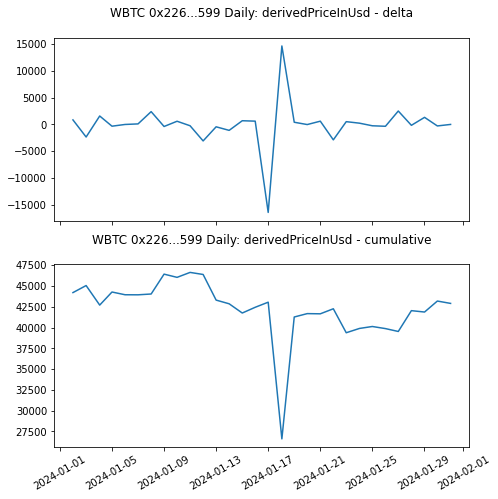

In [20]:
# ERC20 Token Historical
erc20Token = zero_ex.Query.erc20Tokens(first=5, orderBy=zero_ex.Erc20Token.data.erc20InputFillCount, orderDirection="desc")

df = sg.query_df([erc20Token.id, erc20Token.symbol, erc20Token.address], columns=["id", "symbol", "address"])

for row in df.itertuples():
    snapshots = zero_ex.Query.erc20Token(id=row.id).dailyDataSnapshots(first=ALL_ENTRIES, orderBy=zero_ex.DailyErc20TokenData.timestamp, orderDirection="asc")
    df = sg.query_df([snapshots.timestamp, snapshots.data])
    df.rename(columns={ df.columns[0]: TIMESTAMP_NAME }, inplace = True)
    df[TIMESTAMP_NAME] = pd.to_datetime(df[TIMESTAMP_NAME], unit="s")
    # display(df)
    plot_time_series_df(df, f"{row.symbol} {row.address[0:5]}...{row.address[-3:]} Daily", True)

In [21]:
# ERC20 Token Pair Historical
pairs = zero_ex.Query.erc20TokenPairs(first=5, orderBy=zero_ex.Erc20TokenPair.data.fillCountAtoB, orderDirection="desc")

df = sg.query_df([pairs.id, pairs.tokenA.symbol, pairs.tokenB.symbol], columns=["id", "tokenA", "tokenB"])

for row in df.itertuples():
    snapshots = zero_ex.Query.erc20TokenPair(id=row.id).dailyDataSnapshots(first=ALL_ENTRIES, orderBy=zero_ex.DailyErc20TokenPairData.timestamp, orderDirection="asc")
    df = sg.query_df([snapshots.timestamp, snapshots.data])
    df.rename(columns={ df.columns[0]: TIMESTAMP_NAME }, inplace = True)
    df[TIMESTAMP_NAME] = pd.to_datetime(df[TIMESTAMP_NAME], unit="s")
    # display(df)
    plot_time_series_df(df, f"Pair: {row.tokenA} - {row.tokenB} Daily")

ReadTimeout: timed out

0xd07dc4262bcdbf85190c01c996b4c06a461d2430


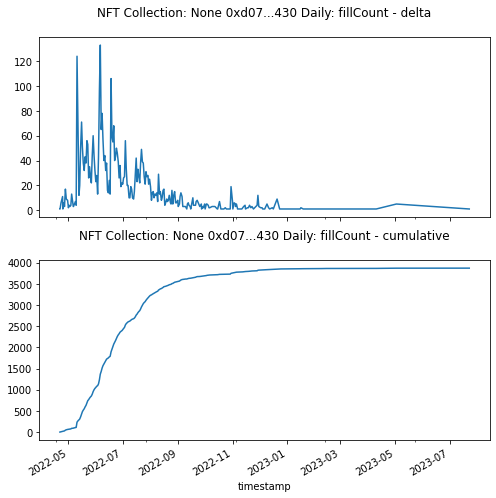

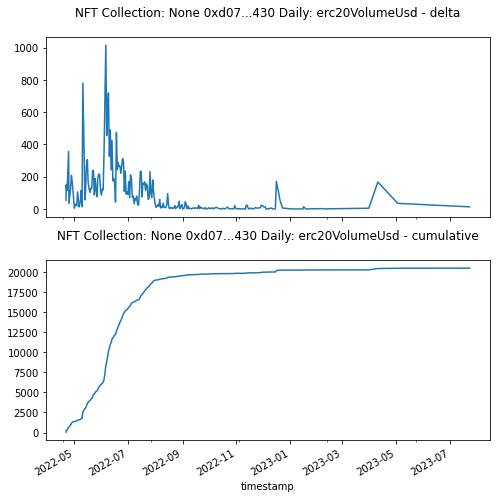

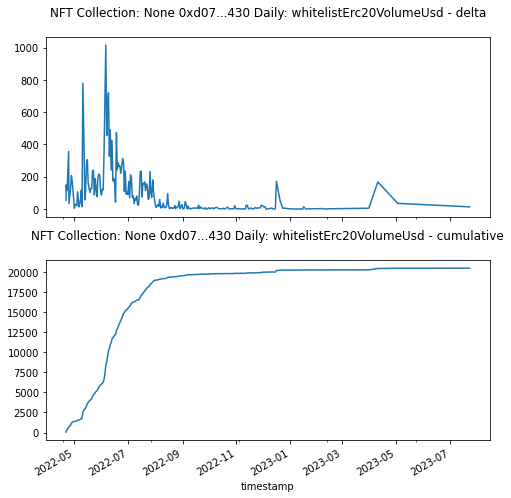

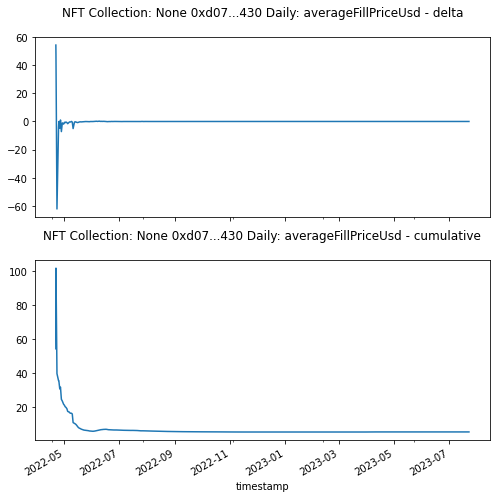

0x495f947276749ce646f68ac8c248420045cb7b5e


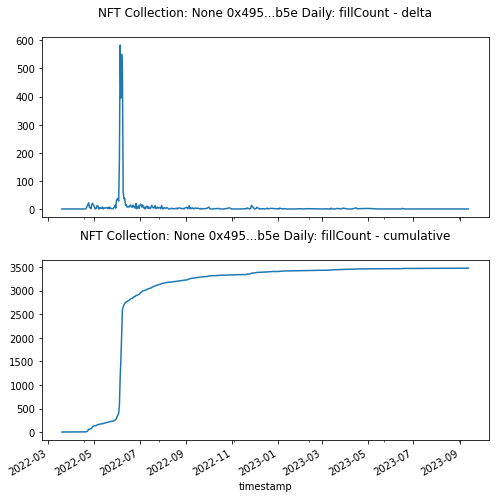

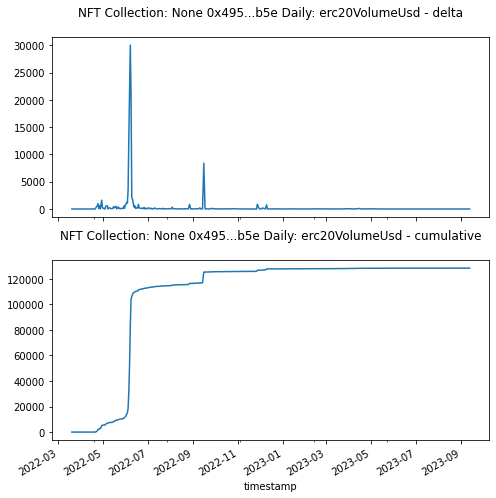

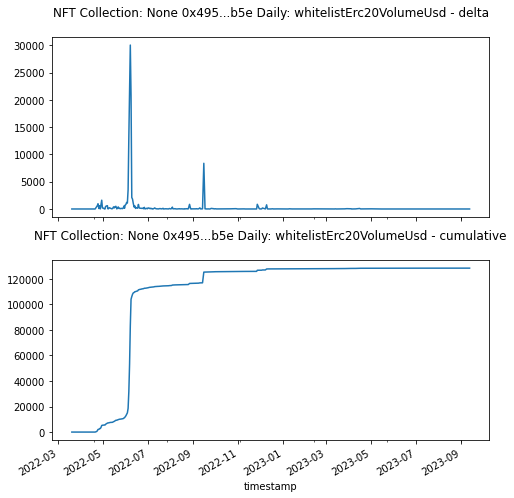

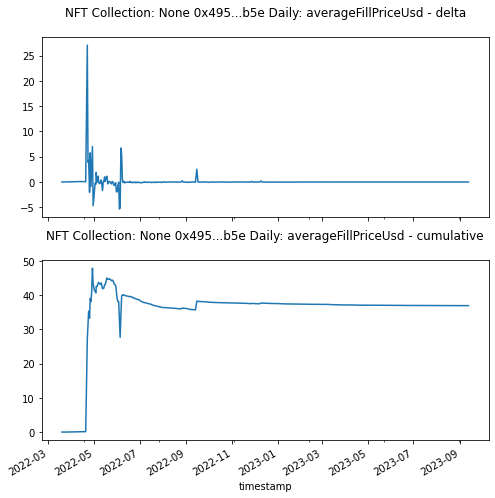

0xb66a603f4cfe17e3d27b87a8bfcad319856518b8


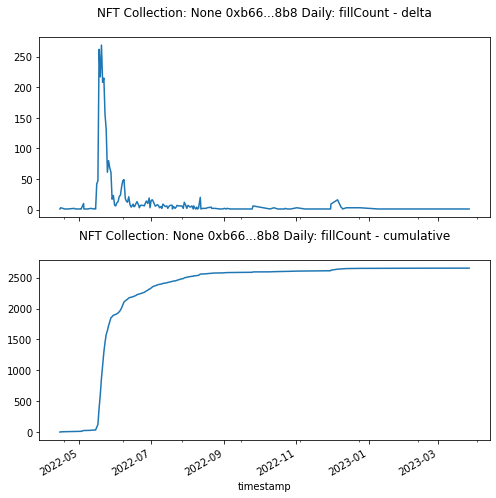

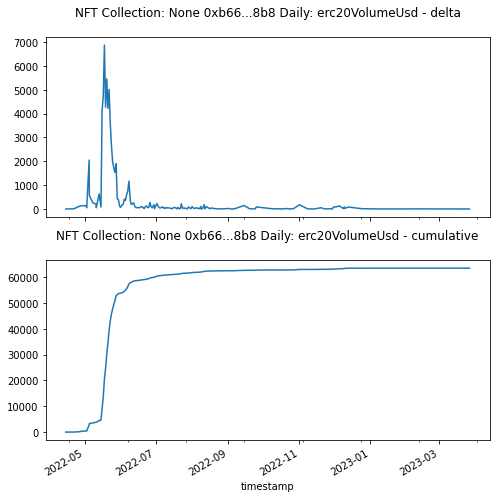

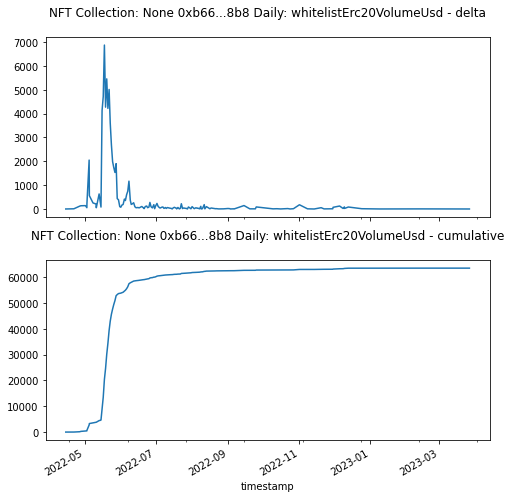

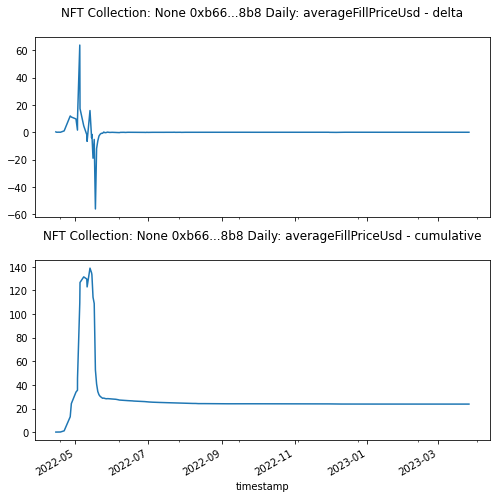

0xa909871f46d2cd8fb015d176483ffc3c330dcda4


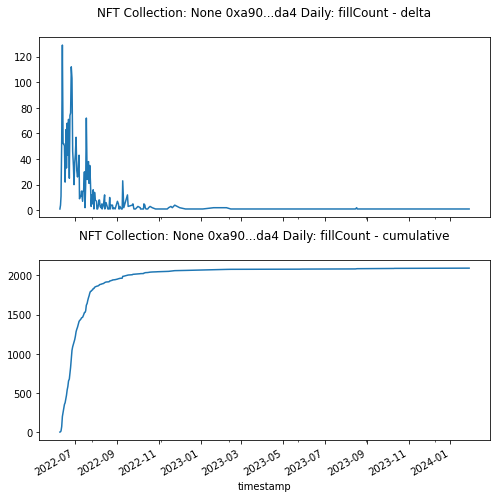

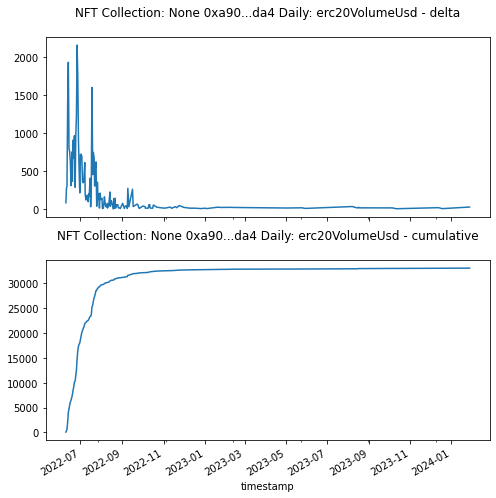

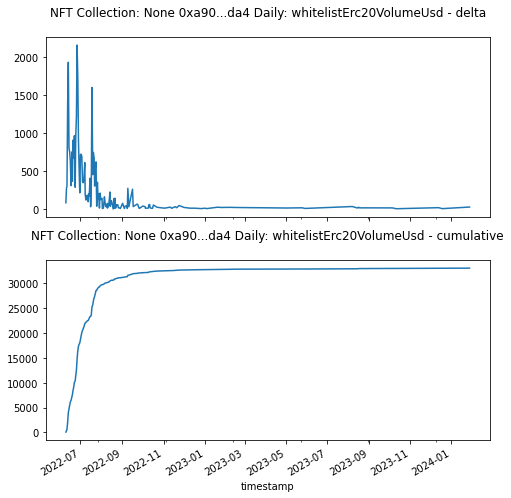

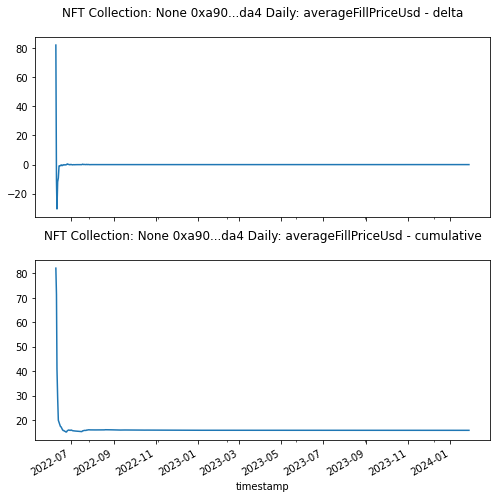

0x3fc09fa16986483edcbad8d6cf5c87e84ad5a4ce


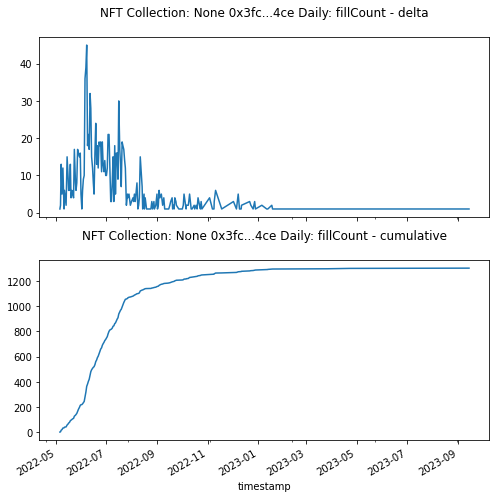

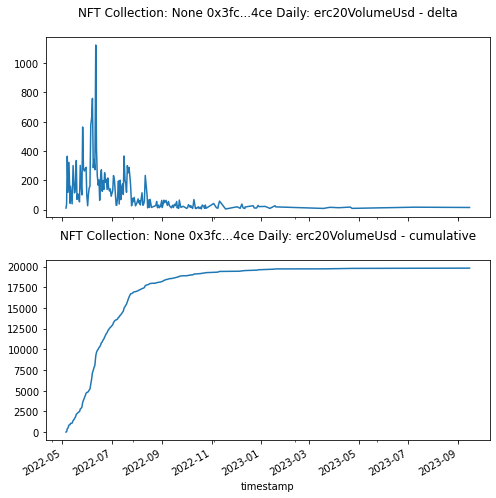

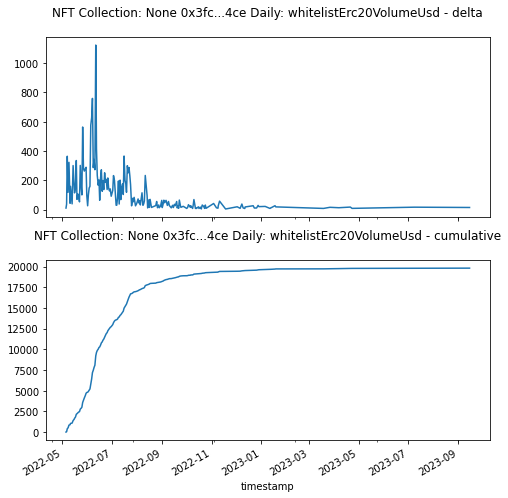

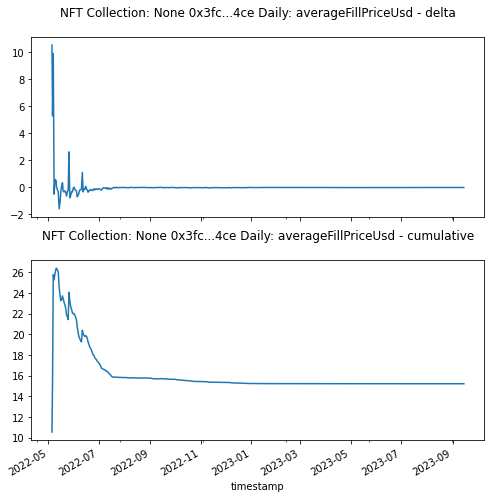

In [ ]:
# Nft Collection Historical
collections = zero_ex.Query.nftCollections(first=5, orderBy=zero_ex.NftCollection.data.fillCount, orderDirection="desc")

df = sg.query_df([collections.id, collections.address, collections.name], columns=["id", "address", "name"])
 
for row in df.itertuples():
    snapshots = zero_ex.Query.nftCollection(id=row.id).dailyDataSnapshots(first=ALL_ENTRIES, orderBy=zero_ex.DailyNftCollectionData.timestamp, orderDirection="asc")
    df = sg.query_df([snapshots.timestamp, snapshots.data])
    df.rename(columns={ df.columns[0]: TIMESTAMP_NAME }, inplace = True)
    df[TIMESTAMP_NAME] = pd.to_datetime(df[TIMESTAMP_NAME], unit="s")
    # display(df)
    print(row.address)
    plot_time_series_df(df, f"NFT Collection: {row.name} {row.address[0:5]}...{row.address[-3:]} Daily")